<a href="https://colab.research.google.com/github/MrKatze07/MLP_Dicoding_StudentPerformance/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Fikri_Haikal_Fadzillah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
student_df = pd.read_csv('data/StudentsPerformance.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data_info = {
    "info": student_df.info(),
    "shape": student_df.shape,
    "dtypes": student_df.dtypes,
    "missing_values": student_df.isnull().sum()
}
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


{'info': None,
 'shape': (1000, 8),
 'dtypes': gender                         object
 race/ethnicity                 object
 parental level of education    object
 lunch                          object
 test preparation course        object
 math score                      int64
 reading score                   int64
 writing score                   int64
 dtype: object,
 'missing_values': gender                         0
 race/ethnicity                 0
 parental level of education    0
 lunch                          0
 test preparation course        0
 math score                     0
 reading score                  0
 writing score                  0
 dtype: int64}

In [8]:
numerical_cols = ['math score', 'reading score', 'writing score']
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
desc_statsnum = student_df[numerical_cols].describe()
desc_statscat = student_df[categorical_cols].describe()

desc_statsnum.describe()

,math score,reading score,writing score
count,8.000000,8.000000,8.000000
mean,172.656510,176.096149,174.874957
std,335.867642,334.200472,334.802567
min,0.000000,14.600192,10.000000
25%,46.540770,48.500000,47.111414
50%,66.044500,69.584500,68.527000
75%,82.750000,84.250000,84.250000
max,1000.000000,1000.000000,1000.000000


In [9]:
desc_statscat.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,4,4,4,4,4
unique,4,4,4,4,4
top,1000,1000,1000,1000,1000
freq,1,1,1,1,1


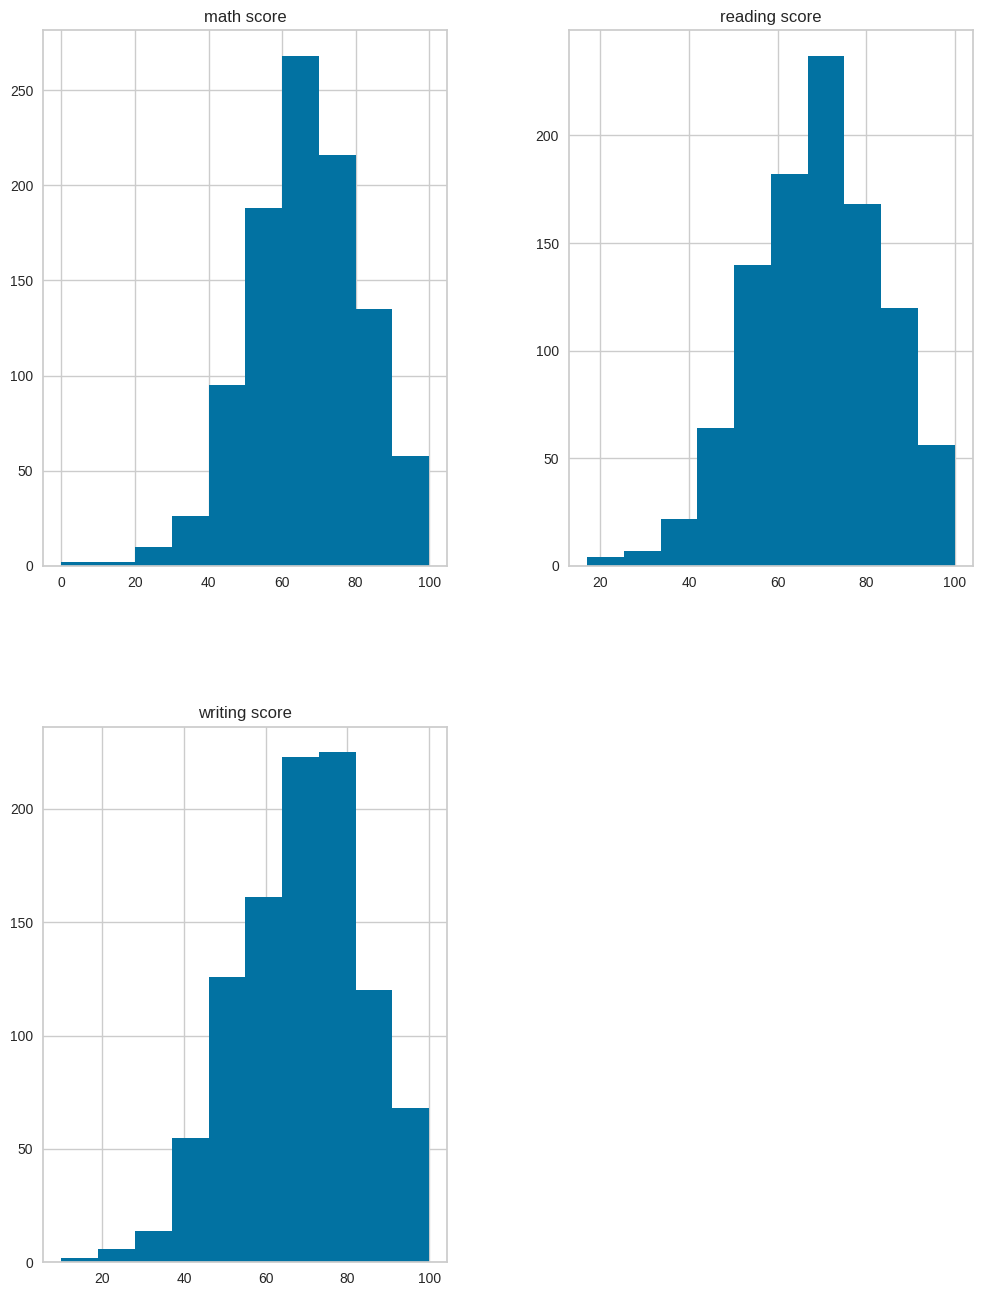

In [10]:
student_df.hist(figsize=(12, 16))
plt.show()

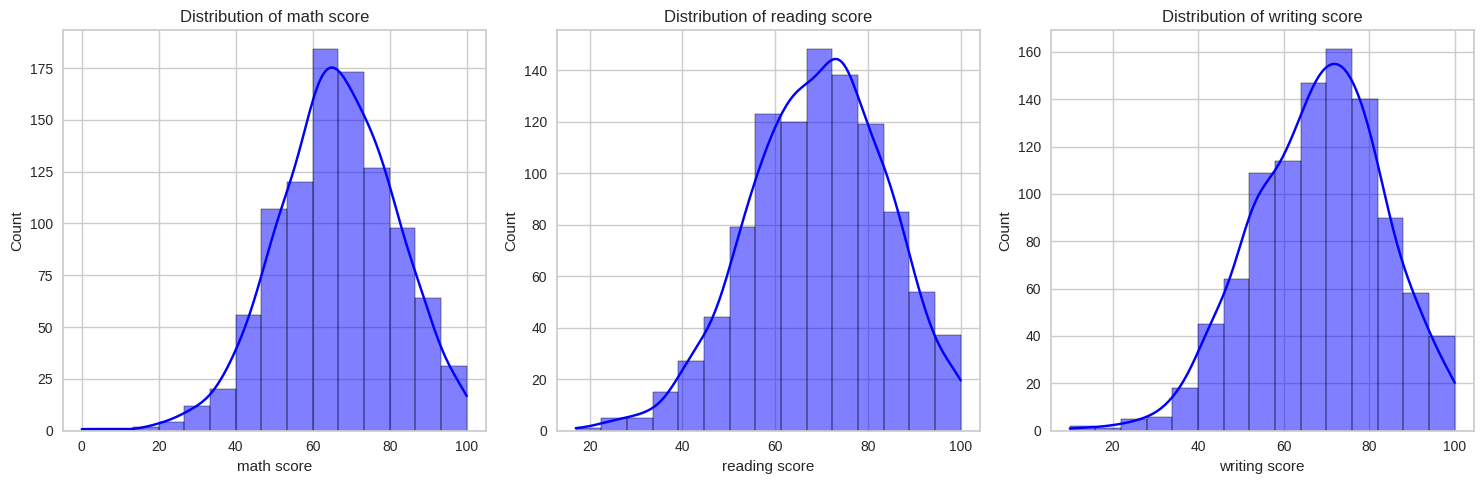

In [15]:
# Distribution Visualizations for numerical columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(student_df[col], kde=True, bins=15, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

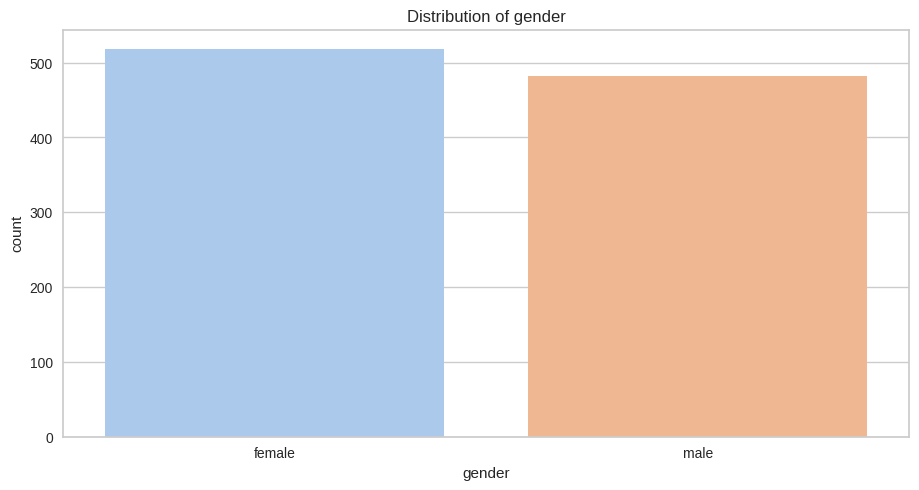

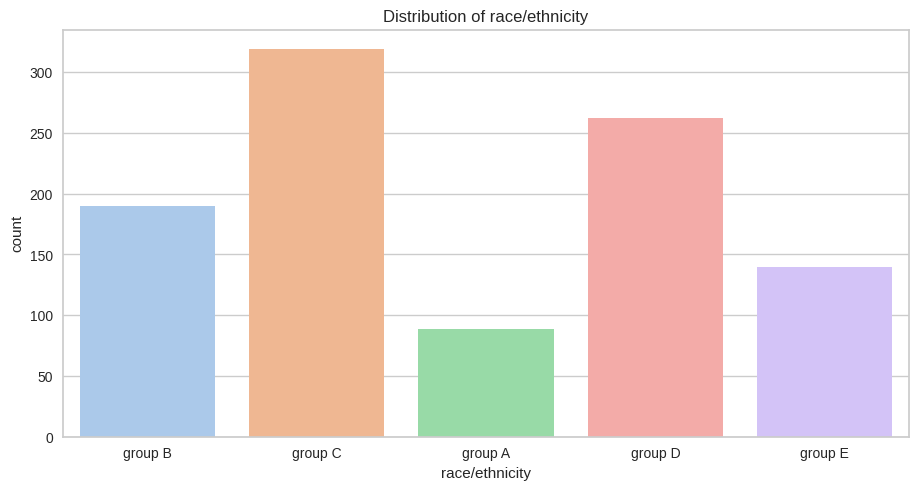

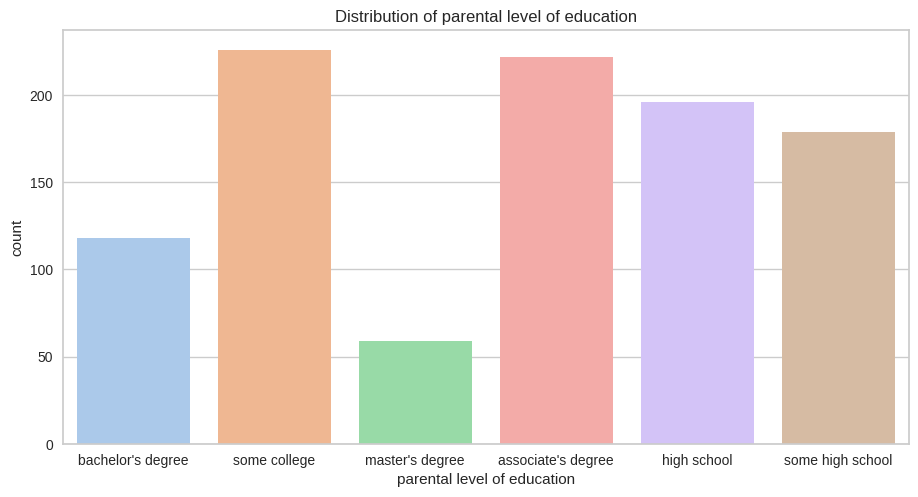

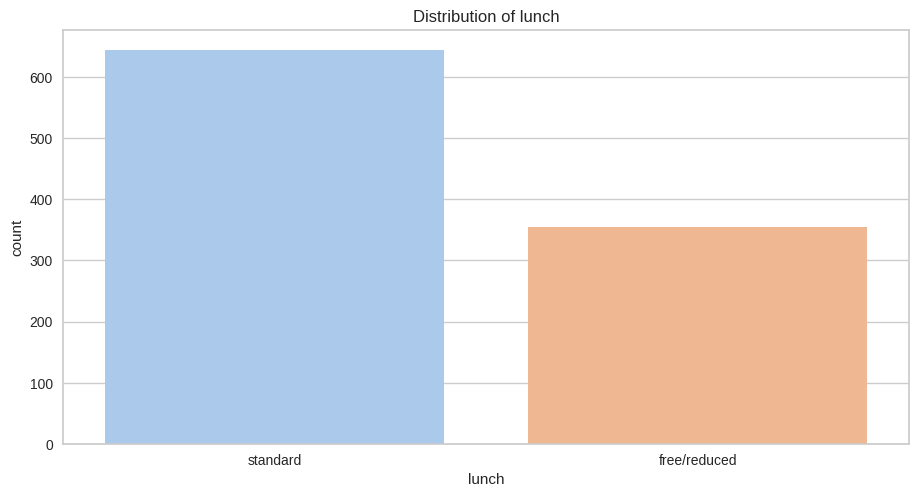

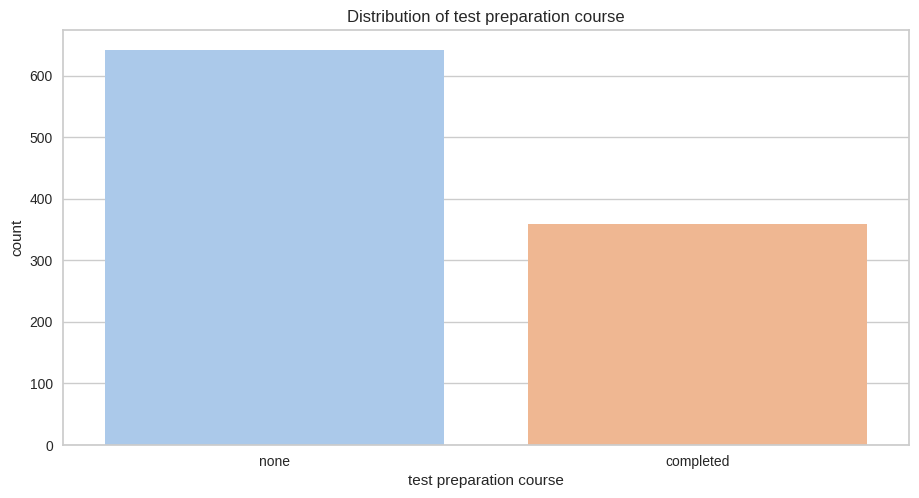

In [11]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(18, 14))
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=student_df, x=col, palette="pastel", hue=col, legend=False )
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

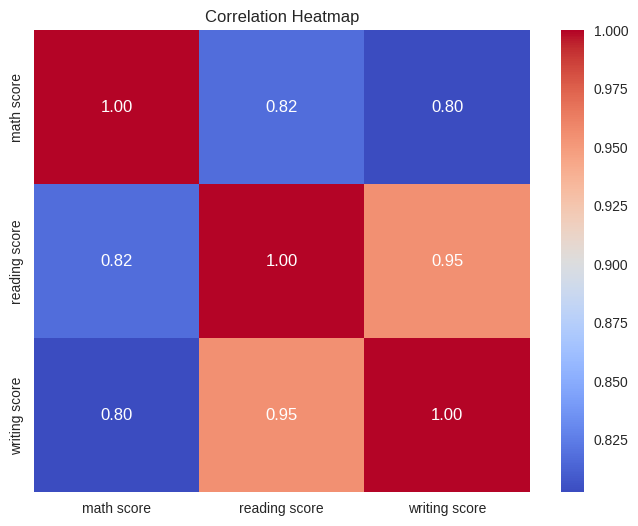

In [13]:
correlation_matrix = student_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

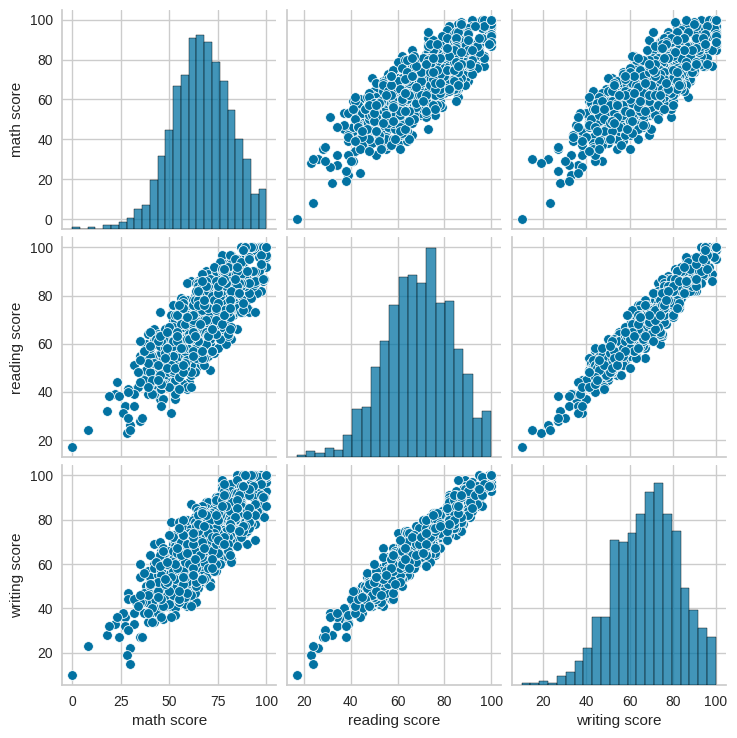

In [14]:
sns.pairplot(student_df[numerical_cols])
plt.show()

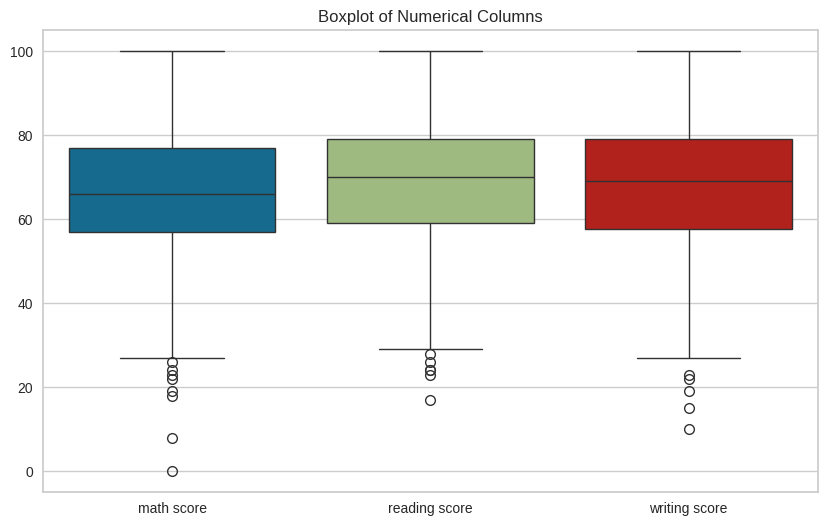

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_df[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [17]:
# Encode categorical features
categorical_cols = student_df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    student_df[col] = label_encoder.fit_transform(student_df[col])

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [52]:
# Normalize numerical scores
numerical_cols = student_df.select_dtypes(include=['float64', 'int']).columns
scaler = MinMaxScaler()
student_df[numerical_cols] = scaler.fit_transform(student_df[numerical_cols])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(student_df[numerical_cols])

# Add cluster labels to the dataset
student_df['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[6.10622664e-16 5.43918919e-01 4.96525097e-01 6.35135135e-01
  6.44787645e-01 6.36332046e-01 6.69977206e-01 6.94079794e-01
  6.10622664e-16]
 [1.00000000e+00 5.35714286e-01 4.89610390e-01 6.59090909e-01
  1.00000000e+00 6.66883117e-01 5.51752464e-01 5.51659452e-01
  1.00000000e+00]
 [1.00000000e+00 5.56034483e-01 5.12643678e-01 6.49425287e-01
  9.99200722e-16 7.23390805e-01 6.41116189e-01 6.64367816e-01
  1.00000000e+00]]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

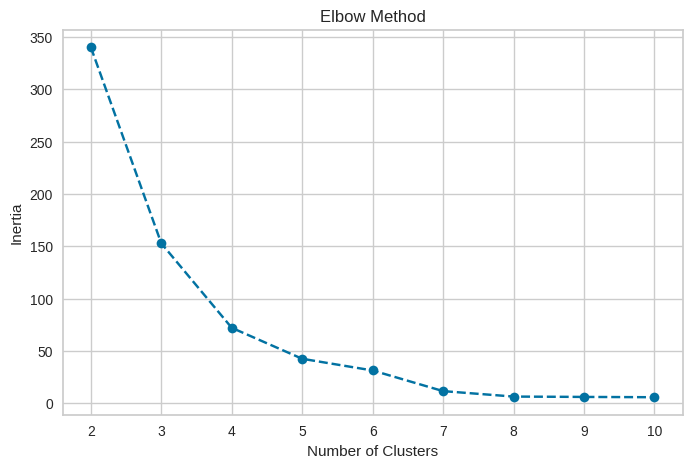

In [61]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(student_df[numerical_cols])

inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

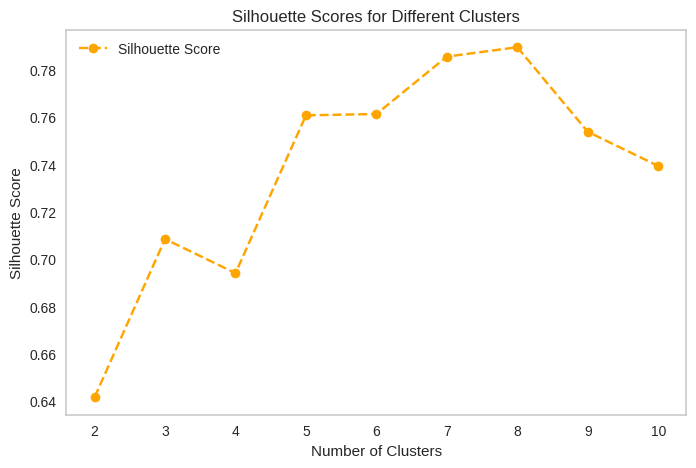

Best Silhouette Score: 0.789649568177518


In [62]:
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    silhouette_scores.append(silhouette_score(data_pca, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()
print(f"Best Silhouette Score: {max(silhouette_scores)}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

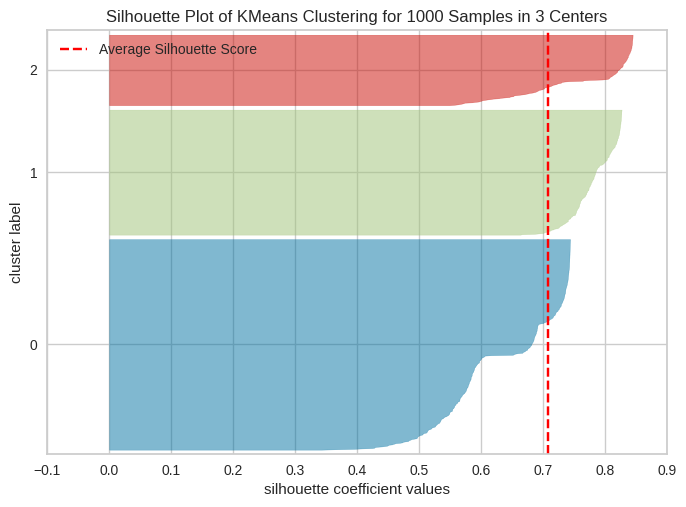

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [67]:
kmeans = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(data_pca)

visualizer.set_title("Silhouette Analysis untuk KMeans clustering")
visualizer.ax.set_xlabel("Nilai Silhouette")
visualizer.ax.set_ylabel("Cluster")

visualizer.show()

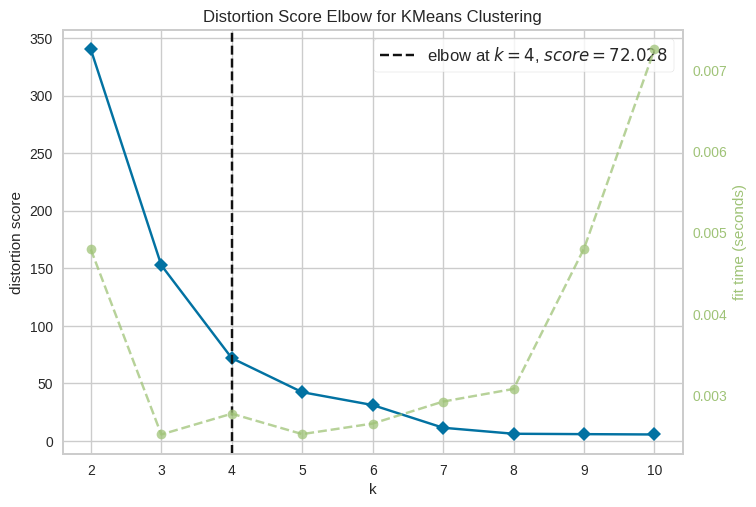

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
visualizer = KElbowVisualizer(kmeans, k=(2,11))
visualizer.fit(data_pca)
visualizer.show()

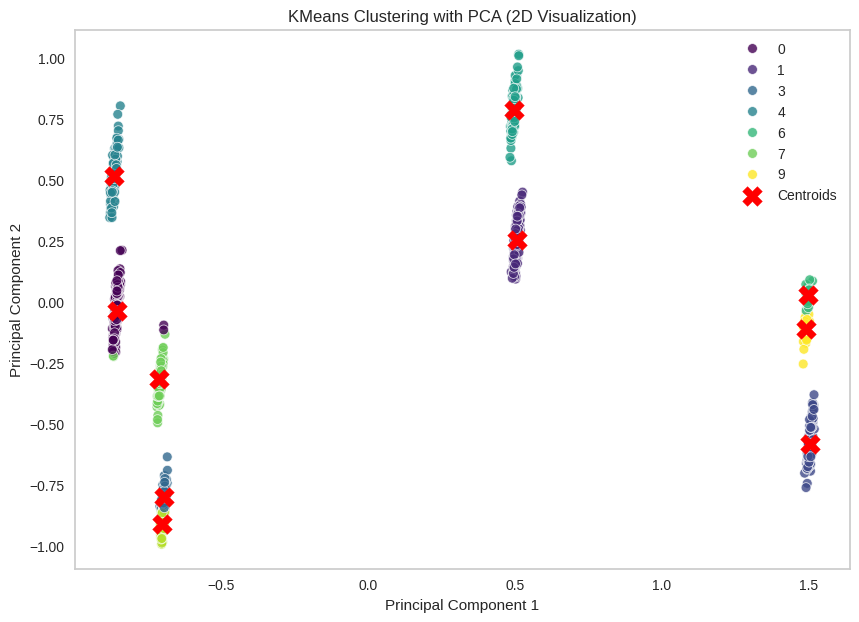

In [63]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    hue=labels,
    palette='viridis',
    s=50,
    alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color='red',
    s=200,
    marker='X',
    label='Centroids'
)
plt.title('KMeans Clustering with PCA (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [68]:
# Group data by clusters and compute mean for each feature
cluster_characteristics = student_df.groupby('Cluster').mean()

print("Cluster Characteristics:")
print(cluster_characteristics)

# Optional: Display count of data points in each cluster
cluster_counts = student_df['Cluster'].value_counts()
print("\nNumber of data points in each cluster:")
print(cluster_counts)

Cluster Characteristics:
         gender  race/ethnicity  parental level of education     lunch  \
Cluster                                                                  
0           0.0        0.543919                     0.496525  0.635135   
1           1.0        0.535714                     0.489610  0.659091   
2           1.0        0.556034                     0.512644  0.649425   

         test preparation course  math score  reading score  writing score  
Cluster                                                                     
0                       0.644788    0.636332       0.669977       0.694080  
1                       1.000000    0.666883       0.551752       0.551659  
2                       0.000000    0.723391       0.641116       0.664368  

Number of data points in each cluster:
Cluster
0    518
1    308
2    174
Name: count, dtype: int64


Tulis hasil interpretasinya di sini.
1. Cluster 0:
*   Performance :
    * Math Score: 0.636332 (di atas rata-rata dataset).
    * Reading Score: 0.669977 (di atas rata-rata dataset).
    * Writing Score: 0.694080 (paling tinggi di antara cluster).


*   Gender: Mayoritas gender di cluster ini adalah 0 (laki-laki dalam encoding).
*   Race/Ethnicity: Nilai rata-rata 0.543919, menunjukkan proporsi etnisitas menengah.
*   Parental Level of Education: Nilai rata-rata 0.496525, menunjukkan tingkat pendidikan orang tua yang seimbang (tidak tinggi maupun rendah).
*   Lunch: Sebagian besar memiliki jenis makan siang berbayar (nilai 0.635135 mendekati kategori berbayar).
*   Test Preparation Course: Sebagian besar telah mengikuti persiapan tes (64.47%).
Interpretasi : Cluster ini terdiri dari siswa dengan performa baik di semua mata pelajaran, terutama di menulis. Siswa ini cenderung mendapatkan dukungan dari kursus persiapan tes, dan kebanyakan adalah laki-laki.
Potensi Pemanfaatan:
  * Kelompok ini dapat dilibatkan dalam program pengembangan akademik tingkat lanjut.
  * Fokus pada pemanfaatan kemampuan menulis mereka dalam kompetisi atau kegiatan literasi.  


2. Cluster 1:
*   Performance :
    * Math Score: 0.666883 (di atas rata-rata dataset).
    * Reading Score: 0.551752 (paling rendah di antara cluster).
    * Writing Score: 0.551659 (paling rendah di antara cluster).


*  Gender: Semua adalah perempuan (encoded sebagai 1).
*  Race/Ethnicity: Nilai rata-rata 0.535714, mirip dengan cluster lain.
*  Parental Level of Education: Nilai rata-rata 0.489610, menunjukkan tingkat pendidikan orang tua yang tidak tinggi.
*   Lunch: Sebagian besar makan siang berbayar (nilai 0.659091).
*   Test Preparation Course: 100% telah mengikuti kursus persiapan tes.

Interpretasi: Cluster ini terdiri dari siswa perempuan yang seluruhnya telah mengikuti kursus persiapan tes. Meski skor matematika cukup tinggi, kemampuan membaca dan menulis mereka relatif lebih rendah.
Potensi Pemanfaatan:
  * Memberikan dukungan tambahan dalam literasi (membaca dan menulis).
  * Meninjau efektivitas kursus persiapan tes yang diikuti.


3. Cluster 2:
*   Performance :
    * Math Score: 0.723391 (tertinggi di antara semua cluster).
    * Reading Score: 0.641116 (di atas rata-rata dataset).
    * Writing Score: 0.664368 (relatif baik).


*  Gender: Semua adalah perempuan (encoded sebagai 1).
*  Race/Ethnicity: Nilai rata-rata 0.556034, sedikit lebih tinggi dari cluster lain.
*  Parental Level of Education: Nilai rata-rata 0.512644, menunjukkan tingkat pendidikan orang tua yang lebih baik dibandingkan cluster lain.
*  Lunch: Sebagian besar memiliki makan siang berbayar (nilai 0.649425).
*  Test Preparation Course: 0% telah mengikuti kursus persiapan tes.

Interpretasi : Cluster ini terdiri dari siswa perempuan dengan performa sangat baik di matematika dan menulis, tetapi tidak ada yang mengikuti kursus persiapan tes. Cluster ini mungkin memiliki latar belakang pendidikan orang tua yang lebih tinggi.
Potensi Pemanfaatan:
  * Mendorong siswa ini untuk berpartisipasi dalam kompetisi matematika.
  * Memberikan peluang eksplorasi untuk bidang STEM.





# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [69]:
student_df.to_csv('next_classification.csv', index=False)